In [1]:
import pandas as pd

df = pd.read_csv("../src/taxipred/data/cleaned_taxi_data.csv", index_col=0)

df.head()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.3500,3.0,3.56,0.80,0.32,53.82,36.2624
1,36.8700,1.0,2.70,1.21,0.15,37.27,52.9032
2,30.3300,4.0,3.48,0.51,0.15,116.81,36.4698
3,8.6332,3.0,2.93,0.63,0.32,22.64,15.6180
4,8.6400,2.0,2.55,1.71,0.48,89.33,60.2028


In [2]:
df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## EDA on dataset

In [3]:
df["Weather"].value_counts()

Weather
Clear    667
Rain     227
Snow      56
Name: count, dtype: int64

<Axes: xlabel='Traffic_Conditions'>

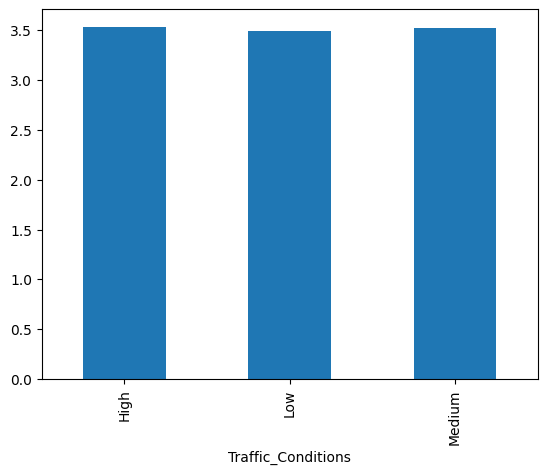

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# morning 
df.groupby("Traffic_Conditions")["Base_Fare"].mean().plot(kind="bar")

In [5]:
# drops half the data, needs cleaning and filling of null
df_no_nulls = df.dropna()
df_no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       562 non-null    float64
 1   Time_of_Day            562 non-null    object 
 2   Day_of_Week            562 non-null    object 
 3   Passenger_Count        562 non-null    float64
 4   Traffic_Conditions     562 non-null    object 
 5   Weather                562 non-null    object 
 6   Base_Fare              562 non-null    float64
 7   Per_Km_Rate            562 non-null    float64
 8   Per_Minute_Rate        562 non-null    float64
 9   Trip_Duration_Minutes  562 non-null    float64
 10  Trip_Price             562 non-null    float64
dtypes: float64(7), object(4)
memory usage: 52.7+ KB


In [6]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [8]:
df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [9]:
df_nulls = df.copy()
df_nulls["null_sum"] = df.isna().sum(axis=1)
df_nulls = df_nulls[df_nulls["null_sum"] > 0]

df_nulls

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,null_sum
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN,2
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698,1
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,1
6,3.85,Afternoon,Weekday,4.0,High,Rain,3.51,1.66,NaN,5.05,11.2645,1
7,43.44,Evening,Weekend,3.0,NaN,Clear,2.97,1.87,0.23,NaN,101.1216,2
...,...,...,...,...,...,...,...,...,...,...,...,...
991,35.04,Morning,Weekend,4.0,Medium,Rain,2.90,1.10,0.15,9.99,NaN,1
993,NaN,Morning,Weekday,3.0,Medium,Clear,2.65,1.35,NaN,25.61,55.3348,2
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295,1
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236,1


<Axes: >

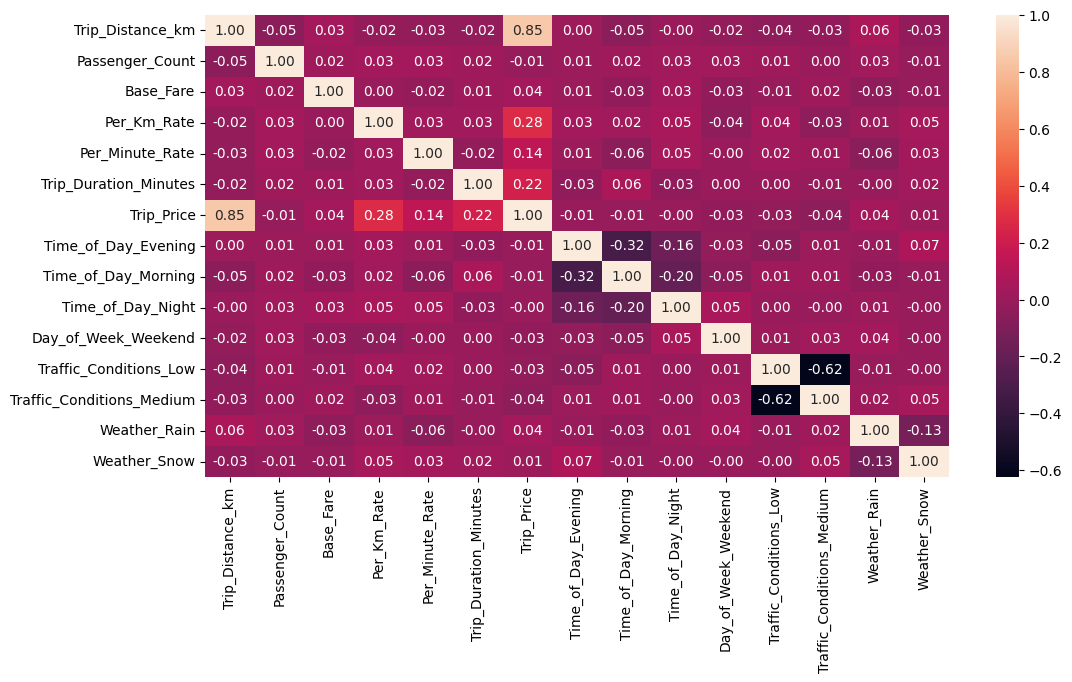

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

encoded_df = pd.get_dummies(df, drop_first=True)*1
encoded_df

fig, ax = plt.subplots(1, figsize=(12,6), dpi=100)
sns.heatmap(encoded_df.corr(), annot=True, fmt=".2f")

<Axes: >

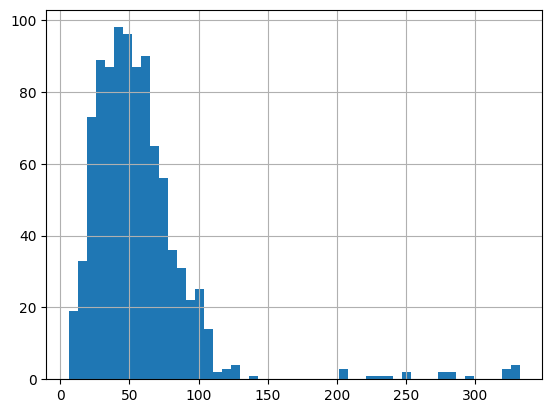

In [11]:
import matplotlib.pyplot as plt

df["Trip_Price"].hist(bins=50)

<Axes: ylabel='Density'>

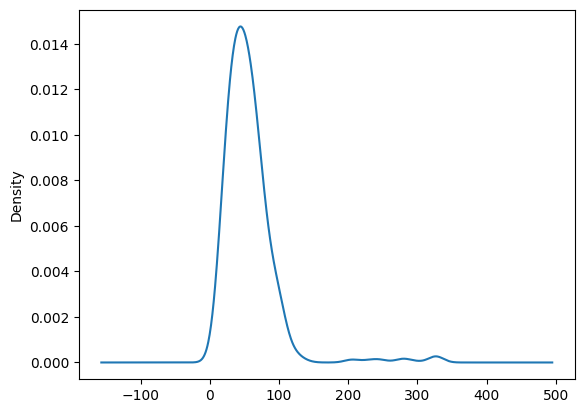

In [12]:
df["Trip_Price"].plot(kind="kde")

<Axes: >

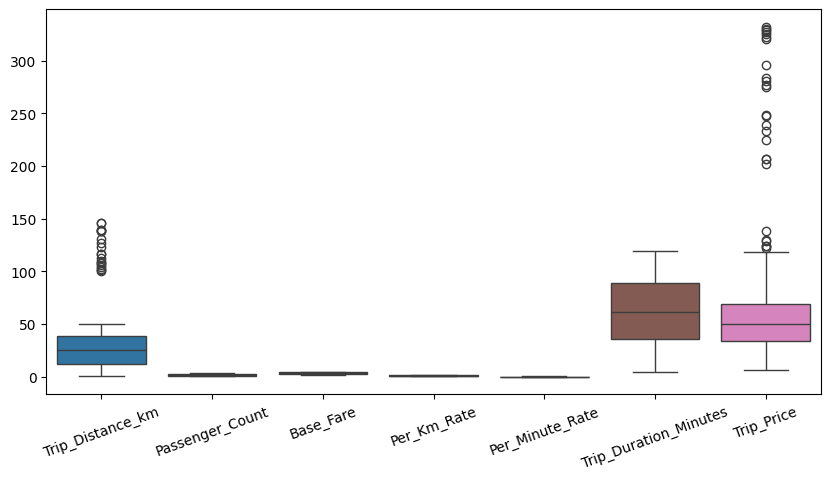

In [13]:
fig, ax = plt.subplots(1, figsize=(10,5), dpi=100)
plt.xticks(rotation=20)
sns.boxplot(df)

In [14]:
df.describe().drop("count").T

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


In [15]:
df["Trip_Distance_km"].median()

np.float64(25.83)

In [16]:
df["Base_Fare"].mean()

np.float64(3.502989473684211)

In [17]:
df["Passenger_Count"].median()

np.float64(2.0)

In [18]:
df["Per_Km_Rate"].mean()

np.float64(1.2333157894736844)

In [19]:
df["Per_Minute_Rate"].median()

np.float64(0.29)

In [20]:
df["Trip_Duration_Minutes"].mean()

np.float64(62.11811578947369)

In [21]:
df["Time_of_Day"].value_counts()

Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
